In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df_insurance = pd.read_csv('insurance.csv', sep=',')

In [3]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,man,33.000,3,no,southeast,4449.46200
3,33,man,22.705,0,no,northwest,21984.47061
4,32,man,28.880,0,no,northwst,3866.85520


In [4]:
df_insurance.describe()

,age,bmi,children,charges
count,1344.000000,1344.000000,1344.000000,1344.000000
mean,38.972470,30.626417,1.090030,13211.179309
std,14.450676,6.131231,1.205011,12115.297713
min,-15.000000,15.070000,0.000000,0.000000
25%,26.000000,26.220000,0.000000,4687.444925
50%,39.000000,30.332500,1.000000,9303.297725
75%,51.000000,34.681250,2.000000,16579.959052
max,64.000000,53.130000,5.000000,63770.428010


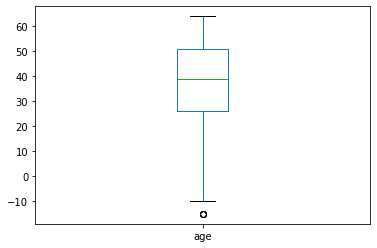

In [5]:
df_insurance.age.plot.box()

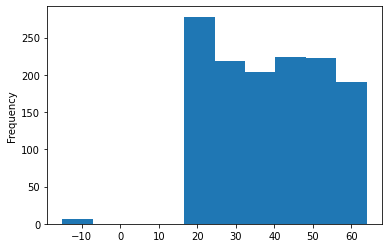

In [6]:
df_insurance.age.plot.hist()

In [7]:
df_insurance = df_insurance[df_insurance.age > 0]

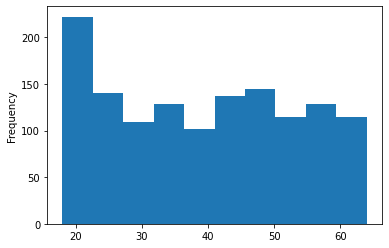

In [8]:
df_insurance.age.plot.hist()

In [9]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='quantile')
df_insurance = df_insurance.assign(age_discretized = discretizer.fit_transform(df_insurance.age.values.reshape(-1, 1)))
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized
0,19,female,27.900,0,yes,southwest,16884.92400,0.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0
2,28,man,33.000,3,no,southeast,4449.46200,2.0
3,33,man,22.705,0,no,northwest,21984.47061,2.0
4,32,man,28.880,0,no,northwst,3866.85520,2.0


In [10]:
[ df_insurance[df_insurance.age_discretized == i].age.plot.density() for i in range(7)]

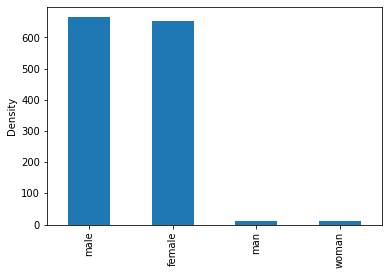

In [11]:
df_insurance.sex.value_counts().plot.bar()

In [12]:
def clean_sex(x: str) -> str:
    if x == 'man':
        return 'male'
    elif x == 'woman':
        return 'female'
    else:
        return x

In [13]:
df_insurance.sex = df_insurance.sex.apply(clean_sex)

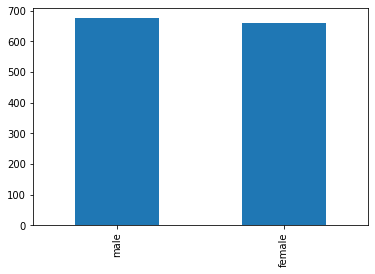

In [14]:
df_insurance.sex.value_counts().plot.bar()

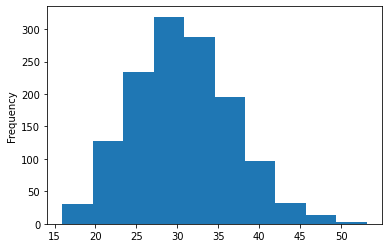

In [15]:
df_insurance.bmi.plot.hist()

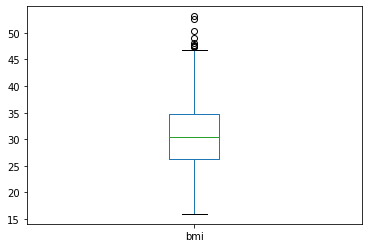

In [16]:
df_insurance.bmi.plot.box()

In [17]:
from matplotlib.cbook import boxplot_stats

In [18]:
stats = boxplot_stats(df_insurance.bmi)[0]
stats

{'mean': 30.66339686098655,
 'iqr': 8.3975,
 'cilo': 30.039569438669766,
 'cihi': 30.76043056133023,
 'whishi': 46.75,
 'whislo': 15.96,
 'fliers': array([49.06, 48.07, 47.52, 47.41, 50.38, 47.6 , 52.58, 47.74, 53.13]),
 'q1': 26.29625,
 'med': 30.4,
 'q3': 34.69375}

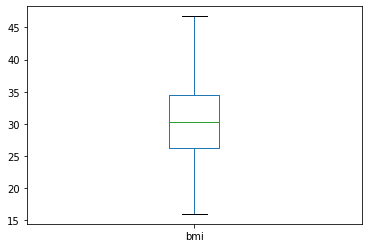

In [19]:
df_insurance = df_insurance[df_insurance.bmi <= stats['whishi']]
df_insurance.bmi.plot.box()

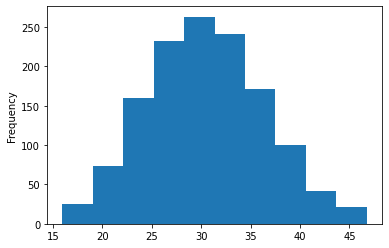

In [20]:
df_insurance.bmi.plot.hist()

In [21]:
def bmi_description(bmi: float) -> str:
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

In [22]:
df_insurance = df_insurance.assign(bmi_description = df_insurance.bmi.apply(bmi_description))
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese
2,28,male,33.000,3,no,southeast,4449.46200,2.0,obese
3,33,male,22.705,0,no,northwest,21984.47061,2.0,normal
4,32,male,28.880,0,no,northwst,3866.85520,2.0,overweight


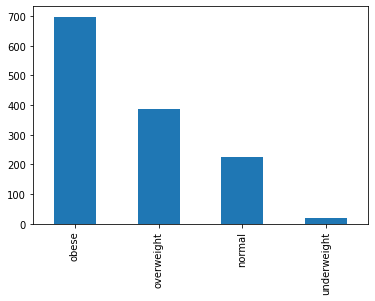

In [23]:
df_insurance.bmi_description.value_counts().plot.bar()

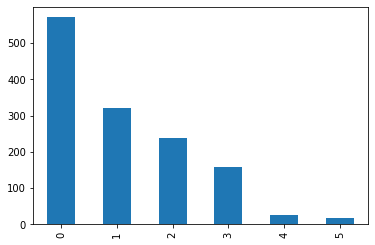

In [24]:
df_insurance.children.value_counts().plot.bar()

In [25]:
def children_description(x: int) -> str:
    if x == 0:
        return 'no children'
    elif x < 4:
        return 'up to 3 children'
    else:
        return 'more than 3 children'

In [26]:
df_insurance = df_insurance.assign(children_description = df_insurance.children.apply(children_description))
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,children_description
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,no children
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,up to 3 children
2,28,male,33.000,3,no,southeast,4449.46200,2.0,obese,up to 3 children
3,33,male,22.705,0,no,northwest,21984.47061,2.0,normal,no children
4,32,male,28.880,0,no,northwst,3866.85520,2.0,overweight,no children


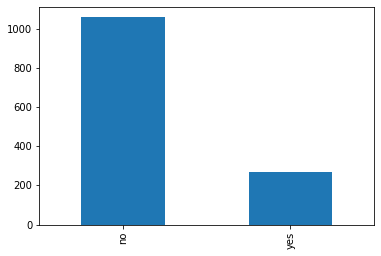

In [27]:
df_insurance.smoker.value_counts().plot.bar()

In [28]:
df_insurance.region.value_counts()

southeast     357
southwest     315
northeast     310
northwest     309
northeastt     10
southwes        9
northwst        9
northwes        5
northeas        3
nortwest        2
Name: region, dtype: int64

In [29]:
def clean_region(x: str) -> str:
    if x in ['northeastt', 'northeas']:
        return 'northeast'
    elif x == 'southwes':
        return 'southwest'
    elif x in ['northwst', 'northwes', 'nortwest']:
        return 'northwest'
    else:
        return x

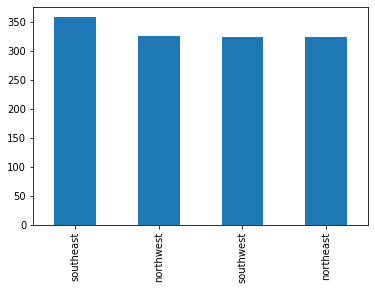

In [30]:
df_insurance.region = df_insurance.region.apply(clean_region)
df_insurance.region.value_counts().plot.bar()

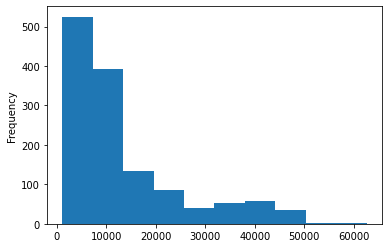

In [31]:
df_insurance.charges.plot.hist()

In [32]:
df_insurance = df_insurance.assign(charges_log = df_insurance.charges.apply(lambda x: np.log(x)))
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,children_description,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,no children,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,up to 3 children,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,2.0,obese,up to 3 children,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,2.0,normal,no children,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,2.0,overweight,no children,8.260197


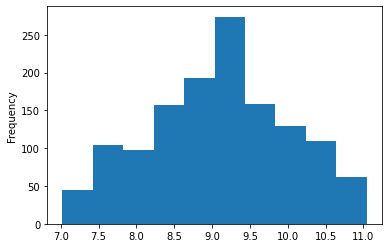

In [33]:
df_insurance.charges_log.plot.hist()

In [34]:
df_insurance.corr()

,age,bmi,children,charges,age_discretized,charges_log
age,1.000000,0.114686,0.043041,0.302022,0.988823,0.529323
bmi,0.114686,1.000000,0.017355,0.193196,0.110423,0.133912
children,0.043041,0.017355,1.000000,0.069739,0.049242,0.161744
charges,0.302022,0.193196,0.069739,1.000000,0.296797,0.893941
age_discretized,0.988823,0.110423,0.049242,0.296797,1.000000,0.523658
charges_log,0.529323,0.133912,0.161744,0.893941,0.523658,1.000000


In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
mms = MinMaxScaler()
df_insurance = df_insurance.assign(charges_minmax = mms.fit_transform(df_insurance.charges.values.reshape(-1,1)))
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,children_description,charges_log,charges_minmax
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,no children,9.734176,0.256431
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,up to 3 children,7.453302,0.009821
2,28,male,33.000,3,no,southeast,4449.46200,2.0,obese,up to 3 children,8.400538,0.054133
3,33,male,22.705,0,no,northwest,21984.47061,2.0,normal,no children,9.998092,0.339389
4,32,male,28.880,0,no,northwest,3866.85520,2.0,overweight,no children,8.260197,0.044655


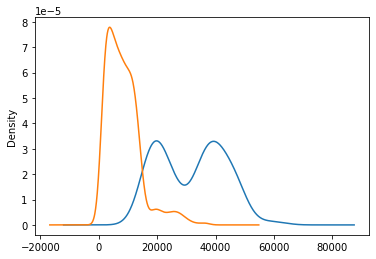

In [37]:
df_insurance[df_insurance.smoker == 'yes'].charges.plot.density()
df_insurance[df_insurance.smoker == 'no'].charges.plot.density()

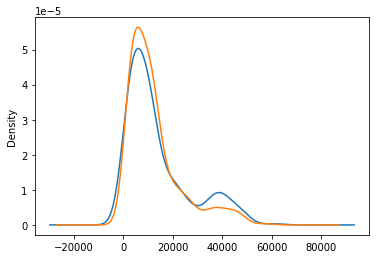

In [38]:
df_insurance[df_insurance.sex == 'male'].charges.plot.density()
df_insurance[df_insurance.sex == 'female'].charges.plot.density()

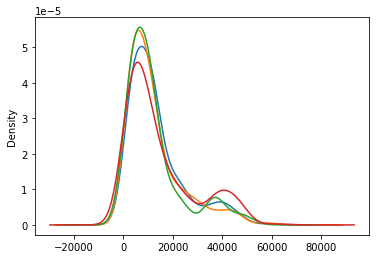

In [39]:
df_insurance[df_insurance.region == 'northeast'].charges.plot.density()
df_insurance[df_insurance.region == 'northwest'].charges.plot.density()
df_insurance[df_insurance.region == 'southwest'].charges.plot.density()
df_insurance[df_insurance.region == 'southeast'].charges.plot.density()

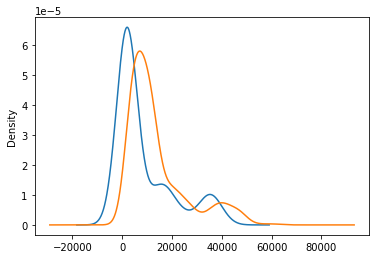

In [40]:
df_insurance[df_insurance.age_discretized == 0].charges.plot.density()
df_insurance[df_insurance.age_discretized != 0].charges.plot.density()

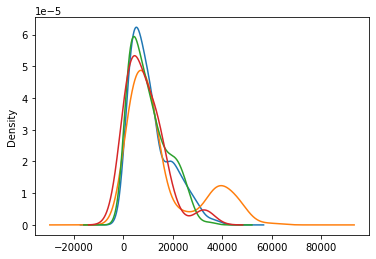

In [41]:
df_insurance[df_insurance.bmi_description == 'overweight'].charges.plot.density()
df_insurance[df_insurance.bmi_description == 'obese'].charges.plot.density()
df_insurance[df_insurance.bmi_description == 'normal'].charges.plot.density()
df_insurance[df_insurance.bmi_description == 'underweight'].charges.plot.density()

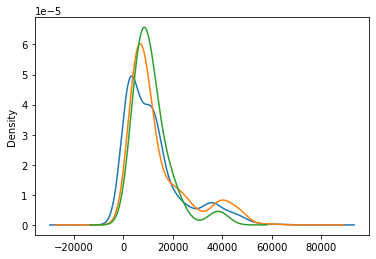

In [42]:
df_insurance[df_insurance.children_description == 'no children'].charges.plot.density()
df_insurance[df_insurance.children_description == 'up to 3 children'].charges.plot.density()
df_insurance[df_insurance.children_description == 'more than 3 children'].charges.plot.density()

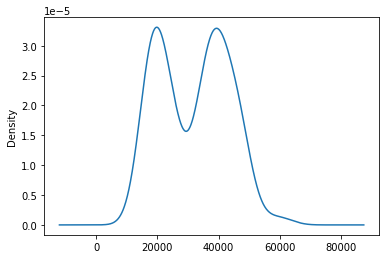

In [43]:
df_insurance[df_insurance.smoker == 'yes'].charges.plot.density()

In [44]:
df_subspace = df_insurance[df_insurance.smoker == 'yes']
df_subspace.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,children_description,charges_log,charges_minmax
0,19,female,27.90,0,yes,southwest,16884.9240,0.0,overweight,no children,9.734176,0.256431
11,62,female,26.29,0,yes,southeast,27808.7251,6.0,overweight,no children,10.233105,0.434137
14,27,male,42.13,0,yes,southeast,39611.7577,1.0,obese,no children,10.586881,0.626147
19,30,male,35.30,0,yes,southwest,36837.4670,2.0,obese,no children,10.514271,0.581015
23,34,female,31.92,1,yes,northeast,37701.8768,2.0,obese,up to 3 children,10.537465,0.595077


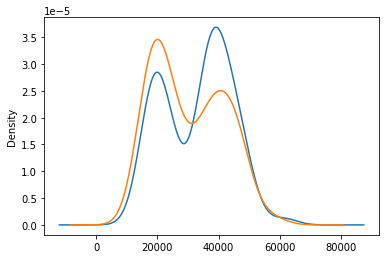

In [45]:
df_subspace[df_subspace.sex == 'male'].charges.plot.density()
df_subspace[df_subspace.sex == 'female'].charges.plot.density()

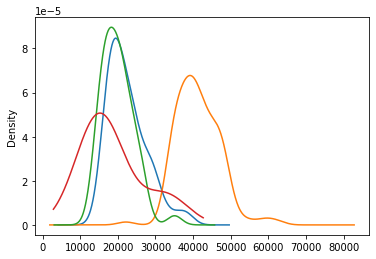

In [46]:
df_subspace[df_subspace.bmi_description == 'overweight'].charges.plot.density()
df_subspace[df_subspace.bmi_description == 'obese'].charges.plot.density()
df_subspace[df_subspace.bmi_description == 'normal'].charges.plot.density()
df_subspace[df_subspace.bmi_description == 'underweight'].charges.plot.density()

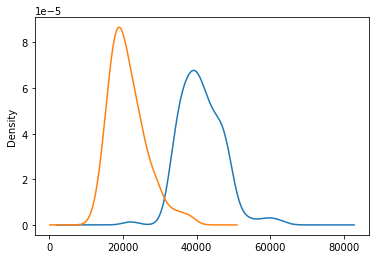

In [47]:
df_subspace[df_subspace.bmi_description == 'obese'].charges.plot.density()
df_subspace[df_subspace.bmi_description != 'obese'].charges.plot.density()

In [48]:
df_insurance =  df_insurance.assign(smoker_bmi = df_insurance.apply(lambda x: '{}_{}'.format(x.smoker, x.bmi_description), axis=1))
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,children_description,charges_log,charges_minmax,smoker_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,no children,9.734176,0.256431,yes_overweight
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,up to 3 children,7.453302,0.009821,no_obese
2,28,male,33.000,3,no,southeast,4449.46200,2.0,obese,up to 3 children,8.400538,0.054133,no_obese
3,33,male,22.705,0,no,northwest,21984.47061,2.0,normal,no children,9.998092,0.339389,no_normal
4,32,male,28.880,0,no,northwest,3866.85520,2.0,overweight,no children,8.260197,0.044655,no_overweight


In [49]:
df_insurance.smoker_bmi = df_insurance.smoker_bmi.apply(lambda x: 'no' if x.startswith('no') else x)
df_insurance.smoker_bmi = df_insurance.smoker_bmi.apply(lambda x: 'yes_not_obese' if x.startswith('yes') and 'obese' not in x else x)
[df_insurance[df_insurance.smoker_bmi == v].charges.plot.density() for v in df_insurance.smoker_bmi.unique()]

[]

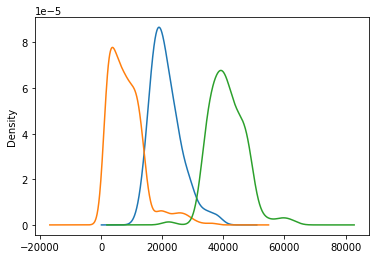

In [50]:
plt.plot()

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [52]:
def smoker_mapping(x: str) -> int:
    if x == 'yes':
        return 1
    else:
        return 0

def return_model(alg: str):
    model = None
    if alg == 'lr':
        model = LinearRegression()
    elif alg == 'lasso':
        model = LassoCV(alphas=np.linspace(0, 5, num=100), cv=KFold(n_splits=k, shuffle=True))
    elif alg == 'ridge':
        model = RidgeCV(alphas=np.linspace(0, 5, num=100), cv=KFold(n_splits=k, shuffle=True))
    
    return model

def build_features(df_train, df_test):
    ohe_sex = OneHotEncoder(sparse=False)
    x_train_sex = ohe_sex.fit_transform(df_train.sex.values.reshape(-1, 1))
    x_test_sex = ohe_sex.transform(df_test.sex.values.reshape(-1, 1))

    ohe_region = OneHotEncoder(sparse=False)
    x_train_region = ohe_region.fit_transform(df_train.region.values.reshape(-1, 1))
    x_test_region = ohe_region.transform(df_test.region.values.reshape(-1, 1))

    ohe_age = OneHotEncoder(sparse=False)
    x_train_age_d = ohe_age.fit_transform(df_train.age_discretized.values.reshape(-1, 1))
    x_test_age_d = ohe_age.transform(df_test.age_discretized.values.reshape(-1, 1))

    ohe_bmi = OneHotEncoder(sparse=False)
    x_train_bmi_d = ohe_bmi.fit_transform(df_train.bmi_description.values.reshape(-1, 1))
    x_test_bmi_d = ohe_bmi.transform(df_test.bmi_description.values.reshape(-1, 1))

    ohe_children = OneHotEncoder(sparse=False)
    x_train_children_d = ohe_children.fit_transform(df_train.children_description.values.reshape(-1, 1))
    x_test_children_d = ohe_children.transform(df_test.children_description.values.reshape(-1, 1))

    ohe_smoker_bmi = OneHotEncoder(sparse=False)
    x_train_smoker_bmi = ohe_smoker_bmi.fit_transform(df_train.smoker_bmi.values.reshape(-1, 1))
    x_test_smoker_bmi = ohe_smoker_bmi.transform(df_test.smoker_bmi.values.reshape(-1, 1))

    mms_age = MinMaxScaler()
    x_train_age = mms_age.fit_transform(df_train.age.values.reshape(-1, 1))
    x_test_age = mms_age.transform(df_test.age.values.reshape(-1, 1))
    
    mms_bmi = MinMaxScaler()
    x_train_bmi = mms_bmi.fit_transform(df_train.bmi.values.reshape(-1, 1))
    x_test_bmi = mms_bmi.transform(df_test.bmi.values.reshape(-1, 1))
    
    x_train_smoker = df_train.smoker.apply(smoker_mapping).values.reshape(-1, 1)
    x_test_smoker = df_test.smoker.apply(smoker_mapping).values.reshape(-1, 1)

    x_train = np.hstack([x_train_sex, x_train_region, x_train_age_d, x_train_bmi_d, x_train_children_d, x_train_age, x_train_bmi, x_train_smoker, x_train_smoker_bmi]) # 
    x_test = np.hstack([x_test_sex, x_test_region, x_test_age_d, x_test_bmi_d, x_test_children_d, x_test_age, x_test_bmi, x_test_smoker, x_test_smoker_bmi]) # 

    y_train = df_train.charges.values.reshape(-1, 1)
    y_test = df_test.charges.values.reshape(-1, 1)

    return x_train, y_train, x_test, y_test

for alg in ['lr', 'lasso', 'ridge']:
    k = 5
    mean_r2 = np.zeros(shape=(k, 2))
    mean_mae = np.zeros(shape=(k, 2))
    cv = KFold(n_splits=k, shuffle=True)
    
    for fold, (train, test) in enumerate(cv.split(df_insurance)):
        df_train = df_insurance.iloc[train]
        df_test = df_insurance.iloc[test]

        x_train, y_train, x_test, y_test = build_features(df_train, df_test)
        
        model = return_model(alg)
        model.fit(x_train, y_train)
        
        y_predict_train = model.predict(x_train)
        mae_train = mean_absolute_error(y_train, y_predict_train)
        r2_train = r2_score(y_train, y_predict_train)

        y_predict_test = model.predict(x_test)
        mae_test = mean_absolute_error(y_test, y_predict_test)
        r2_test = r2_score(y_test, y_predict_test)

        mean_mae[fold, 0] = mae_train
        mean_mae[fold, 1] = mae_test
        
        mean_r2[fold, 0] = r2_train
        mean_r2[fold, 1] = r2_test

    print('-' * 50)
    print('Algoritmo:', alg)
    print('-' * 50)
    print('Treino - Média MAE:', mean_mae[:,0].mean())
    print('Teste - Média MAE:', mean_mae[:,1].mean())
    print('-' * 50)
    print('Treino - Média R2:', mean_r2[:,0].mean())
    print('Teste - Média R2:', mean_r2[:,1].mean())
    print('-' * 50)
    print(mean_mae[:,1])
    print()

--------------------------------------------------
Algoritmo: lr
--------------------------------------------------
Treino - Média MAE: 2456.651438537296
Teste - Média MAE: 2523.9121950298345
--------------------------------------------------
Treino - Média R2: 0.8649195826704412
Teste - Média R2: 0.8585664442886642
--------------------------------------------------
[2821.52440237 2202.45618305 2454.15663906 2716.59171    2424.83204068]



/home/geovanileitao/Documentos/repositorio/pos-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/geovanileitao/Documentos/repositorio/pos-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/home/geovanileitao/Documentos/repositorio/pos-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8349964370.209869, tolerance: 12090581.617336083
  model = cd_fast.enet_coordinate_descent_gram(
/home/geovanileitao/Docume

/home/geovanileitao/Documentos/repositorio/pos-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/home/geovanileitao/Documentos/repositorio/pos-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8540753304.695709, tolerance: 11757047.105027985
  model = cd_fast.enet_coordinate_descent_gram(
/home/geovanileitao/Documentos/repositorio/pos-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/home/geovanileitao/Documentos/repositorio/pos-data-science/.venv/lib/py

--------------------------------------------------
Algoritmo: lasso
--------------------------------------------------
Treino - Média MAE: 2397.762518417155
Teste - Média MAE: 2438.2316244155054
--------------------------------------------------
Treino - Média R2: 0.8658490902145781
Teste - Média R2: 0.8557694655596201
--------------------------------------------------
[2240.86493975 2378.23011436 2431.64860944 2559.37386713 2581.0405914 ]

--------------------------------------------------
Algoritmo: ridge
--------------------------------------------------
Treino - Média MAE: 2389.7790142739104
Teste - Média MAE: 2454.2450423616506
--------------------------------------------------
Treino - Média R2: 0.8665210628744988
Teste - Média R2: 0.8607366310400776
--------------------------------------------------
[2434.59067725 1981.86967698 2687.46095618 2744.47838387 2422.82551753]



In [53]:
from scipy.stats import ttest_ind

res_lr = [2475.38218402, 2609.05832966, 2425.71091203, 2235.02602162, 2583.49276135 ]
res_las = [2111.25728745, 2339.21066171, 2800.2501861, 2586.80752494, 2374.25278511 ]

t_test = ttest_ind(res_lr, res_las)
alpha = 0.05

if t_test.pvalue < alpha:
    print('Rejeitamos a hipótese nula. As duas médias são diferentes!')
else:
    print('Aceita a hipótese nula. As duas médias não são diferentes')

Aceita a hipótese nula. As duas médias não são diferentes


In [55]:
cv = KFold(n_splits=k, shuffle=True)

predicted = list()
ground_truth = list()
for fold, (train, test) in enumerate(cv.split(df_insurance)):
    
    df_train = df_insurance.iloc[train]
    df_test = df_insurance.iloc[test]
    
    x_train, y_train, x_test, y_test = build_features(df_train, df_test)
    
    model = return_model('lr')
    model.fit(x_train, y_train)
    
    predicted.extend(model.predict(x_test))
    ground_truth.extend(y_test)

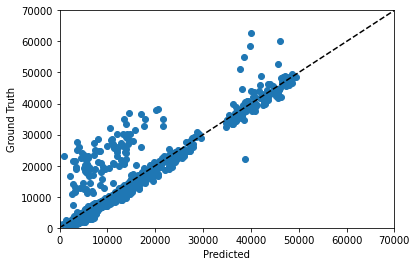

In [56]:
fig, ax = plt.subplots()

ax.scatter(x=predicted, y=ground_truth)
ax.plot([0, 70000], [0,70000], 'k--')
ax.set_xlim([0, 70000])
ax.set_ylim([0, 70000])
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground Truth')
plt.show()

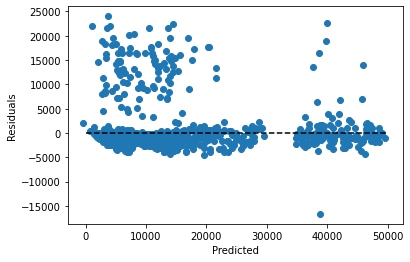

In [57]:
fig, ax = plt.subplots()

residuals = [ ground_truth[i] - predicted[i] for i in range(len(predicted))]
ax.scatter(x=predicted, y=residuals)
ax.plot([0, 50000], [0,0], 'k--')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.show()